<a href="https://colab.research.google.com/github/DineshSiddhartha/DataScience-Project/blob/main/Jupyter_Notebooks/spotify_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")
genre_data = pd.read_csv('/content/drive/MyDrive/data/data_by_genres.csv')
year_data = pd.read_csv('/content/drive/MyDrive/data/data_by_year.csv')

In [ ]:
# Remove columns with NaN values in genre_data
genre_data_cleaned = genre_data.dropna(axis=1)

# Remove columns with NaN values in year_data
year_data_cleaned = year_data.dropna(axis=1)
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
print(data.columns)
print(genre_data_cleaned.columns)
print(year_data_cleaned.columns)


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')
Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')


In [ ]:
merged_with_year = data.merge(year_data_cleaned, on='year', suffixes=('', '_year'))


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [ ]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


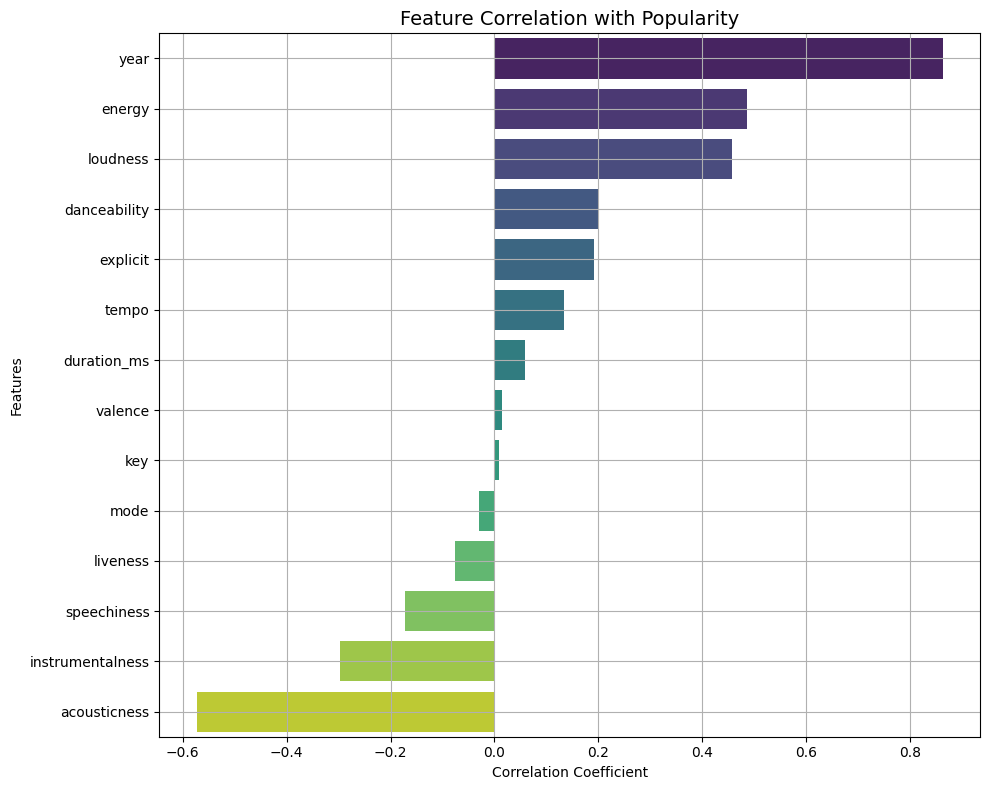

In [ ]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                 'duration_ms', 'explicit', 'key', 'mode', 'year']

X = data[feature_names]
y = data['popularity']

df_corr = X.copy()
df_corr['popularity'] = y

# Compute correlation matrix
corr_matrix = df_corr.corr()

target_corr = corr_matrix['popularity'].drop('popularity').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.title('Feature Correlation with Popularity', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def cosine_similarity(x, y, eps=1e-8):
    x, y = np.array(x), np.array(y)
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y) + eps)

def hss_similarity(x, y, alpha=2.0, beta=1.5, gamma=0.5, lam=1.0, eps=1e-8):
    cos_sim = cosine_similarity(x, y, eps)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)

    term1 = alpha * np.arcsinh(beta * cos_sim)
    term2 = gamma * np.arctan(np.linalg.norm(x - y) / (np.linalg.norm(x + y) + eps))
    term3 = -lam * np.exp(-abs(norm_x - norm_y))
    score = term1 + term2 + term3
    return 1 / (1 + np.exp(-score))  # sigmoid to keep in [0,1]

def relu_weighted_cosine(x, y, alpha=0.5, eps=1e-8):
    cos_sim = cosine_similarity(x, y, eps)
    boost = np.maximum(0, cos_sim - alpha)
    return np.clip(cos_sim + boost, 0, 1)

def tanh_dot_similarity(x, y, scale=0.1):
    raw_dot = np.dot(x, y)
    return np.tanh(scale * raw_dot)

def inverse_hyperbolic_angle(x, y, eps=1e-8):
    cos_sim = np.clip(cosine_similarity(x, y, eps), -1 + eps, 1 - eps)
    angle = np.arccos(cos_sim)
    return 1 - np.tanh(angle)

def norm_contrast_cosine(x, y, gamma=0.3, eps=1e-8):
    cos_sim = cosine_similarity(x, y, eps)
    norm_diff = abs(np.linalg.norm(x) - np.linalg.norm(y))
    return cos_sim * np.exp(-gamma * norm_diff)

def sigmoid_projected_similarity(x, y, eps=1e-8):
    proj = np.dot(x, y) / (np.linalg.norm(y)**2 + eps)
    return 1 / (1 + np.exp(-proj))


In [ ]:

def calculate_recommendations(fixed_songs, data, metrics, feature_cols):

    vectors, artists, valid_songs = [], [], []
    for song in fixed_songs:
        match = data[
            (data['name'].str.lower() == song['name'].lower()) &
            (data['year'] == song['year'])
        ]
        if not match.empty:
            vectors.append(match[feature_cols].values[0])
            artists.append(match['artists'].values[0])
            valid_songs.append(song)

    scaler = StandardScaler()
    scaled_vectors = scaler.fit_transform(vectors)

    median_vector = np.median(vectors, axis=0)
    scaled_median = scaler.transform(median_vector.reshape(1, -1))[0]

    recommendations = {}
    for metric_name, metric_func in metrics.items():
        similarities = [metric_func(scaled_median, vec) for vec in scaled_vectors]
        sorted_indices = np.argsort(similarities)[::-1]  # Descending order

        recommendations[metric_name] = [{
            'name': valid_songs[i]['name'],
            'year': valid_songs[i]['year'],
            'artist': artists[i],
            'score': similarities[i]
        } for i in sorted_indices]

    return recommendations

features = ['danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence']

fixed_songs = data[['name', 'year']].drop_duplicates().sample(200, random_state=42)
fixed_list = fixed_songs.to_dict('records')


metrics = {
    'Cosine': cosine_similarity,
    'HSS': hss_similarity,
    'ReLU-Cosine': relu_weighted_cosine,
    'Tanh-Dot': tanh_dot_similarity,
    'Inverse-Hyperbolic': inverse_hyperbolic_angle,
    'Norm-Contrast': norm_contrast_cosine,
    'Sigmoid-Proj': sigmoid_projected_similarity
}

# recommendations = calculate_recommendations(fixed_list, data, metrics, features)





In [ ]:
def compare_to_cosine(recommendations, top_n=100):
    """Compare each metric's recommendations to those from cosine similarity."""
    cosine_recs = recommendations['Cosine']
    cosine_song_ids = [(song['name'], song['year']) for song in cosine_recs[:top_n]]

    results = {}
    for metric_name, recs in recommendations.items():
        if metric_name == 'Cosine':
            continue

        metric_song_ids = [(song['name'], song['year']) for song in recs[:top_n]]

        overlap_count = len(set(cosine_song_ids).intersection(set(metric_song_ids)))
        overlap_ratio = overlap_count / top_n

        common_songs = set(cosine_song_ids).intersection(set(metric_song_ids))
        if len(common_songs) > 1:
            cosine_ranks = {song_id: rank for rank, song_id in enumerate(cosine_song_ids)}
            metric_ranks = {song_id: rank for rank, song_id in enumerate(metric_song_ids)}

            # Get ranks for common songs
            common_song_list = list(common_songs)
            cosine_common_ranks = [cosine_ranks[song] for song in common_song_list]
            metric_common_ranks = [metric_ranks[song] for song in common_song_list]

            # Calculate Spearman correlation
            from scipy.stats import spearmanr
            spearman_corr, _ = spearmanr(cosine_common_ranks, metric_common_ranks)
        else:
            spearman_corr = None

        results[metric_name] = {
            'overlap_count': overlap_count,
            'overlap_ratio': overlap_ratio,
            'spearman_correlation': spearman_corr
        }

    return results

# After calculating recommendations as before
recommendations = calculate_recommendations(fixed_list, data, metrics, features)

# Compare each metric's recommendations to cosine similarity
comparison_results = compare_to_cosine(recommendations)

# Print the comparison results
print("Comparison to Cosine Similarity Recommendations:\n")
print(f"{'Metric':<20} {'Top-50 Overlap':<20} {'Spearman Correlation':<20}")
print("-" * 60)

for metric_name, result in comparison_results.items():
    overlap = result['overlap_ratio']
    overlap_count = result['overlap_count']
    corr = result['spearman_correlation']

    overlap_str = f"{overlap:.2f} ({overlap_count}/{100})"
    corr_str = f"{corr:.3f}" if corr is not None else "N/A"

    print(f"{metric_name:<20} {overlap_str:<20} {corr_str:<20}")

# Then print the detailed recommendations with indicators
print("\nDetailed Recommendations:")
for metric_name, recs in recommendations.items():
    print(f"\n{'='*60}")
    print(f"=== {metric_name} Recommendations ===")
    print(f"{'='*60}")

    for idx, song in enumerate(recs[:100], 1):
        song_id = (song['name'], song['year'])
        in_cosine = song_id in [(s['name'], s['year']) for s in recommendations['Cosine'][:100]]
        indicator = " *" if in_cosine and metric_name != 'Cosine' else ""
        print(f"{idx:2}. {song['name'][:25]:<25} ({song['year']}) | {song['artist'][:20]:<20} | Score: {song['score']:.3f}{indicator}")

    print(f"{'='*60}")


Comparison to Cosine Similarity Recommendations:

Metric               Top-50 Overlap       Spearman Correlation
------------------------------------------------------------
HSS                  0.95 (95/100)        0.911               
ReLU-Cosine          1.00 (100/100)       1.000               
Tanh-Dot             0.97 (97/100)        0.803               
Inverse-Hyperbolic   1.00 (100/100)       1.000               
Norm-Contrast        0.99 (99/100)        0.975               
Sigmoid-Proj         0.97 (97/100)        0.951               

Detailed Recommendations:

=== Cosine Recommendations ===
 1. Intimate Friends          (1977) | ['Eddie Kendricks']  | Score: 0.784
 2. Be My Little Baby Bumble  (1953) | ['Doris Day', 'Paul  | Score: 0.705
 3. I Think I'm Going To Kill (1972) | ['Elton John']       | Score: 0.692
 4. Tú Ganas                  (1984) | ['José José']        | Score: 0.670
 5. Better Place              (2016) | ['Rachel Platten']   | Score: 0.669
 6. Stop in Ne